In [5]:
import acoular
import matplotlib.pyplot as pl
import ipywidgets as ipw
import numpy as np
from glob import glob
from os import path
import pylab as plt
import math as m
import os
from matplotlib import font_manager as fm, rcParams
import scipy as sc


In [2]:
#Einlesen der Micgeo
micgeofile = 'mic_geo.xml'
mg = acoular.MicGeom(from_file=micgeofile)
mg.mpos[0] = - mg.mpos[0] #Spiegeln
mg.mpos[0] = mg.mpos[0] + 0.419 #Versatz
#print(mg.mpos)

#Rotationsmatrix
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

for i in range (64):
    Punkt = [mg.mpos[0][i],mg.mpos[1][i],mg.mpos[2][i]]
    rot = np.array(Punkt * Rx(np.radians(-45)))
    #print(rot[0][0])
    mg.mpos[0][i] = rot[0][0]
    mg.mpos[1][i] = rot[0][1]
    mg.mpos[2][i] = rot[0][2]
mg.mpos[1] = - mg.mpos[1]

#plt.ion()
#plt.plot(mg.mpos[2],mg.mpos[1],'o')

In [112]:
# Messung 13
sfreq = 51200
duration = 1
nsamples = duration*sfreq

sim_signal1 = acoular.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
sim_signal2 = acoular.WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2)

#sim_ts1 = acoular.PointSource(signal = sim_signal1,          # Signal der Quelle
#                   loc = (7.5, 0.2, 8.0),  # Position der Punktquelle im links-orientierten Koordinatensystem
#                   mics = mg,            # Mikrofongeometrie, auf der Messdaten erzeugt werden sollen
#                   env = e)             # Umgebung, in der sich das Schallfeld ausbreitet
sim_ts2 = acoular.PointSource(signal = sim_signal2,          # Signal der Quelle
                   #loc = (-5.0, 0.2, 8),  # Position der Punktquelle im links-orientierten Koordinatensystem
                   loc = (1, 0.2, 2),  # Position der Punktquelle im links-orientierten Koordinatensystem
                   mics = mg,            # Mikrofongeometrie, auf der Messdaten erzeugt werden sollen
                   env = e)             # Umgebung, in der sich das Schallfeld ausbreitet
#ts = acoular.SourceMixer( sources=[sim_ts1,sim_ts2])
ts = sim_ts2 

Einlesen der Daten:

In [113]:
# Umgebung definieren (Medium, Strömung etc)
t = 23.6
e = acoular.Environment(c = 20.05*np.sqrt(273+t))

#Einlesen der Daten:
#ts = acoular.TimeSamples( name='Messungen WFS\msm_025.h5' )
#ts = acoular.TimeSamples( name='Messungen_WFS/msm_013.h5' )
#ts = acoular.TimeSamples( name='Messungen_WFS/msm_025.h5' )


#Grid erstellen


#============== Messung 1,2,3,4,5,15,16,17,18,19,20,23,24,25,36,27,28 ==============
rg = acoular.RectGrid( x_min=-3, x_max=3.0, 
                       y_min=-3.0, y_max=3.0, 
                       z=2, 
                       increment=0.01 )          

#Steering Vector
st = acoular.SteeringVector( grid=rg, 
                             mics=mg, 
                             ref=1,     # Tipp von Gert, ref auf 1m, stimmt das so? Und wieso?
                             env = e,
                             steer_type = 'true location') # ???

#Spectrum erstellen:
ps = acoular.PowerSpectra( time_data=ts, 
                           block_size=512, # Gert empfiehlt ab 4096
                           freq_range=[600, 2000],
                           window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128


bb = acoular.BeamformerBase( freq_data=ps, 
                             steer=st )




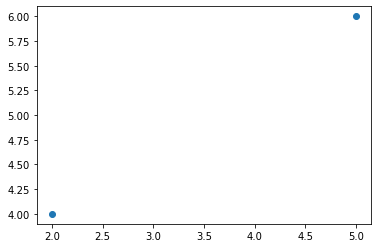

In [77]:
#ps.fftfreq()  
x = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 6, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 8, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0]])

#diese = sc.signal.argrelmax(x)
diese = sc.signal.argrelextrema(x, np.greater)


plt.scatter(diese[0], diese[1])

/var/folders/vt/7kjpwdgs64549p0v6331n9wr0000gn/T/ipykernel_7140/3938132902.py:38: RuntimeWarning: divide by zero encountered in true_divide
  ax1.scatter(3/Lm_max[0],3/Lm_max[1],color='orange')


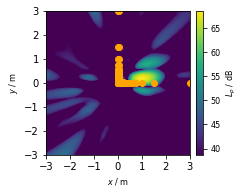

In [119]:
# 500 1000 2000
# 500 630 800 1000 1250 1600 2000 2500 3150 4000 5000 6300 8000 10000 12500 16000 20000

Frequenz = 1600

pm = bb.synthetic(Frequenz, 3) # 0=Freq, 1=Okt, 3=Terz
Lm = acoular.L_p(pm)
Lm_max = sc.signal.argrelmax(Lm)
i,j = np.unravel_index(Lm.T.argmax(), Lm.T.shape)
#fpath = os.path.join(rcParams["Users/adrian/Documents/AKT/10_WiSe21/40_Mikrofonarray/MAP_eval/"], "cmunrm.ttf")
#prop = fm.FontProperties(fname=fpath)
#fname = os.path.split(fpath)[1]
#ax1.set_title('This is a special font: {}'.format(fname), fontproperties=prop)

FONTSIZE = 8
fig, (ax1) = plt.subplots(1,1, figsize=(3.5,3.5))
#ax1.scatter(Lm_max[0],Lm_max[1])
#ax1.scatter(Lm_max[0],Lm_max[1])  

im = ax1.imshow(Lm.T, 
            origin='lower', 
            vmin=Lm.max()-30, 
            extent=rg.extend(), 
            interpolation='nearest')  # bicubic vs nearest? -> bicubic beschoenigt

ax1.set_xticks([-3,-2,-1,0,1,2,3])
ax1.set_yticks([-3,-2,-1,0,1,2,3])
#ax1.set_yticks([-3,0,3])
#ax1.set_xticks([-10,-5,0,5,10])
ax1.set_xlabel('$x$ / m',fontsize=FONTSIZE)
ax1.set_ylabel('$y$ / m',fontsize=FONTSIZE)
#ax1.set_xticklabels(['-3','-2','-1','0','1','2','3'])    
#ax1.tick_params(axis='both', which='major', labelsize=FONTSIZE)   
cbar = fig.colorbar(im,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=FONTSIZE)
cbar.set_label('$L_p$ / dB', fontsize=FONTSIZE)
ax1.scatter(6/i,6/j, color='red')
ax1.scatter(3/Lm_max[0],3/Lm_max[1],color='orange')  
fig.tight_layout()
#plt.savefig('Plots/Abstract/%s_terz5000Hz.pdf'%ts.name[14:21], dpi = 300, format='pdf')
#plt.savefig('Plots/Abstract/013_terz1600Hz_simuliert.pdf', dpi = 300, format='pdf')


In [115]:
print(i,j)

320 400


In [63]:
# Umgebung definieren (Medium, Strömung etc)
t = 23.6
e = acoular.Environment(c = 20.05*np.sqrt(273+t))

#Einlesen der Daten:
#ts = acoular.TimeSamples( name='Messungen WFS\msm_025.h5' )
ts = acoular.TimeSamples( name='Messungen_WFS/msm_015.h5' )


#Grid erstellen
rg = acoular.RectGrid3D(x_min=-2, x_max=2, 
                       y_min=0, y_max=0, 
                       z_min=1, z_max=5, 
                       increment=0.01)

#Steering Vector
st = acoular.SteeringVector( grid=rg, 
                             mics=mg, 
                             #ref=1,     # Tipp von Gert, ref auf 1m, stimmt das so? Und wieso?
                             env = e,
                             steer_type = 'classic') # ???

#Spectrum erstellen:
ps = acoular.PowerSpectra( time_data=ts, 
                           block_size=128,
                           freq_range=[20, 4000],
                           window='Hanning' ) # Für bessere Auflösung hier Block_size erhöhen -> höherer Rechnenaufwand, daher jetzt erstmal mit 128


bb = acoular.BeamformerBase( freq_data=ps, 
                             steer=st )

[('msm_015_cache.h5', 4)]


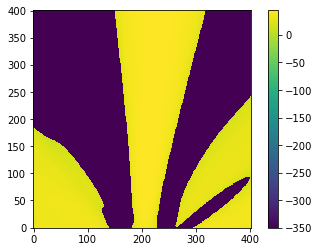

In [64]:
# 500 1000 2000
# 500 630 800 1000 1250 1600 2000 2500 3150 4000 5000 6300 8000 10000 12500 16000 20000

Frequenz = 2000

pm = bb.synthetic(Frequenz, 3) # 0=Freq, 1=Okt, 3=Terz
Lm2 = acoular.L_p( pm )
Lm2 = Lm2[:,0,:]
#Lm = (Lm[0:],Lm[1:])
plt.figure()
plt.imshow( Lm2.T, 
            origin='lower', 
            #vmin=Lm.max()-10, 
            #extent=rg.extend(), 
            interpolation='nearest')  # bicubic vs nearest? -> bicubic beschoenigt
plt.colorbar()
#plt.savefig('Plots/%s_terz10000Hz'%ts.name[14:21], dpi = 300, format='png')
plt.show()

In [65]:
Lm2 = Lm2[:,0,:]
Lm2.shape

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:

'''
map_z = sum(pm,2)
map_y = sum(pm,1)
map_x = sum(pm,0)

plt.figure()
plt.imshow( map_x.T, 
            origin='lower', 
            vmin=Lm.max()-10, 
            extent=rg.extend(), 
            interpolation='bicubic')  # bicubic vs nearest?
plt.colorbar()
#plt.savefig('Plots/%s_okt_1600'%ts.name[14:21], dpi = 300, format='png')
plt.show()

'''

a = np.array([[0,1,2,3,4],[00,11,22,33,44]])
b = (a[:,4],a[:,2])


TypeError: Cannot construct a dtype from an array

In [ ]:
from acoular import __file__ as bpath, L_p, MicGeom, PowerSpectra,\
RectGrid3D, BeamformerBase, BeamformerCleansc, \
SteeringVector, WNoiseGenerator, PointSource, SourceMixer

from numpy import mgrid, arange, array, arccos, pi, cos, sin, sum
import mpl_toolkits.mplot3d
from pylab import figure, show, scatter, subplot, imshow, title, colorbar,\
xlabel, ylabel

b = acoular.BeamformerCleansc(freq_data=ps, steer=st)

g = acoular.RectGrid3D(x_min=-0.5, x_max=0.5, 
                       y_min=-0.5, y_max=0.5, 
                       z_min=1.5, z_max=2.5, 
                       increment=0.02)

map = b.synthetic(2000,1)

<ipython-input-75-858483a2851c>:1: Warning: Queried frequency (1500 Hz) not in set of discrete FFT sample frequencies. Using frequency 1600 Hz instead.
  map = bb.synthetic(1500, 0)


TypeError: Invalid shape (401,) for image data

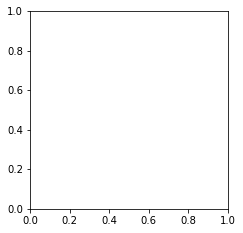

In [ ]:
map = bb.synthetic(1500, 0)
fig=figure(1,(8,8))

subplot(221)
map_z = sum(map,0)
mx = L_p(map_z.max())
imshow(L_p(map_z.T), vmax=mx, vmin=mx-20, origin='lower', interpolation='nearest', 
       extent=(g.x_min, g.x_max, g.y_min, g.y_max))
xlabel('x')
ylabel('y')
title('Top view (xy)' )

subplot(223)
map_y = sum(map,1)
imshow(L_p(map_y.T), vmax=mx, vmin=mx-20, origin='upper', interpolation='nearest', 
       extent=(g.x_min, g.x_max, -g.z_max, -g.z_min))
xlabel('x')
ylabel('z')
title('Side view (xz)' )

subplot(222)
map_x = sum(map,0)
imshow(L_p(map_x), vmax=mx, vmin=mx-20, origin='lower', interpolation='nearest', 
       extent=(-g.z_min, -g.z_max,g.y_min, g.y_max))
xlabel('z')
ylabel('y')
title('Side view (zy)' )
colorbar()

In [ ]:
ax0 = fig.add_subplot((224), projection='3d')
ax0.scatter(mg.mpos[0],mg.mpos[1],-mg.mpos[2])
#source_locs=array([p1.loc,p2.loc,p3.loc]).T
#ax0.scatter(source_locs[0],source_locs[1],-source_locs[2])
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('z')
ax0.set_title('Setup (mic and source positions)')
#plt.show()

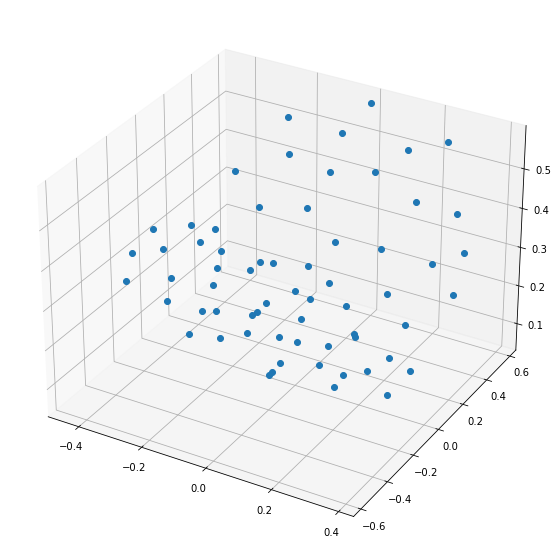

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10),sharey=True)
ax = plt.axes(projection='3d')
ax.plot3D(mg.mpos[0], mg.mpos[1], mg.mpos[2], 'o')

<ipython-input-78-4423b32eef9d>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


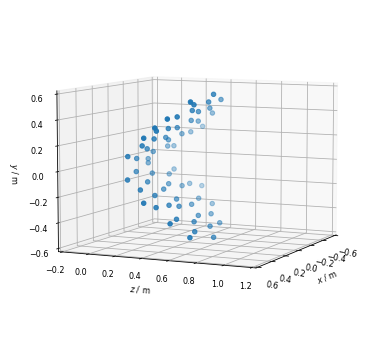

In [78]:
fig,ax = plt.subplots(1,1,figsize=(6,6),sharey=True)
ax = plt.axes(projection='3d')
ax.scatter(mg.mpos[0], mg.mpos[2], mg.mpos[1])
ax.view_init(7, 25)
ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.2,1.2)
ax.set_zlim(-0.6,0.6)
ax.set_xlabel('$x$ / m',fontsize=FONTSIZE)
ax.set_ylabel('$z$ / m',fontsize=FONTSIZE)
ax.set_zlabel('$y$ / m',fontsize=FONTSIZE)
ax.tick_params(axis='x', labelsize=FONTSIZE, rotation =350) 
ax.tick_params(axis='y', labelsize=FONTSIZE) 
ax.tick_params(axis='z', labelsize=FONTSIZE) 
fig.show()
#fig.tight_layout()
plt.savefig('Plots/Abstract/micpos.pdf', dpi = 300, format='pdf')